# Practical No. 10: Variability (Dispersion) with Visualization

---- Variability (Dispersion) Program ----

Original Data:
   Values
0    45.0
1    79.0
2    33.0
3    69.0
4    54.0
5    12.0

--- Measures of Variability ---
Range: 67.0000
Variance: 593.0667
Standard Deviation: 24.3530
Coefficient of Variation (CV): 50.04%

Manual Calculation Check:
Variance (manual): 593.0667
Standard Deviation (manual): 24.3530


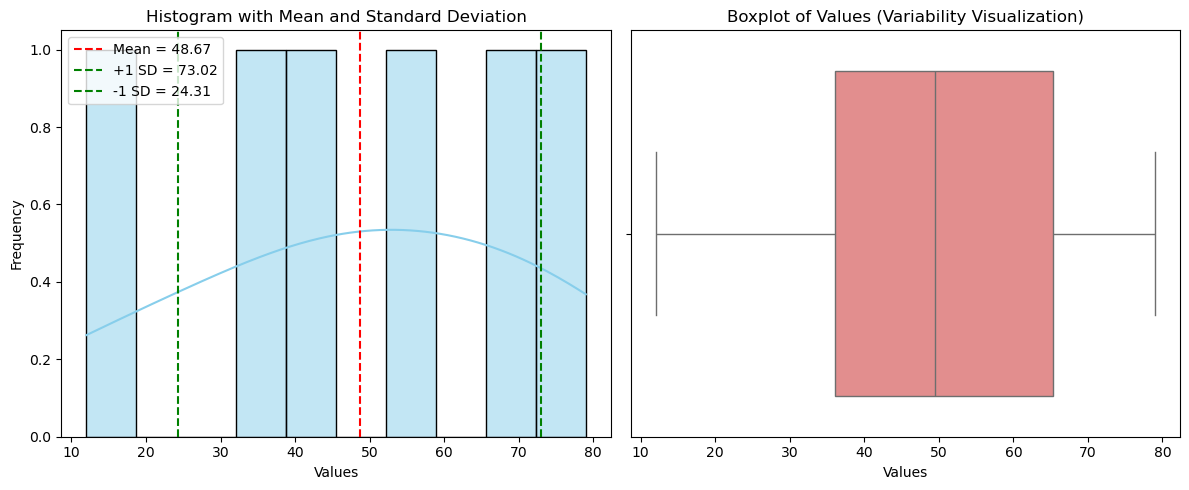

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("---- Variability (Dispersion) Program ----")

# ---- Step 1: Input Data ----
choice = input("Enter '1' for manual input or '2' to read from CSV file: ")

if choice == '1':
    n = int(input("Enter number of data points: "))
    data = []
    for i in range(n):
        val = float(input(f"Enter value {i+1}: "))
        data.append(val)
    df = pd.DataFrame({'Values': data})

elif choice == '2':
    file_path = input("Enter CSV file path: ")
    column_name = input("Enter column name to analyze: ")
    df = pd.read_csv(file_path)
    df = df[[column_name]].rename(columns={column_name: 'Values'})

else:
    print("Invalid choice! Exiting program.")
    exit()

print("\nOriginal Data:")
print(df)

# ---- Step 2: Compute Measures of Variability ----
values = df['Values']

_range = values.max() - values.min()
variance = values.var(ddof=1)     # sample variance
std_dev = values.std(ddof=1)      # sample standard deviation
mean = values.mean()
cv = (std_dev / mean) * 100 if mean != 0 else np.nan  # Coefficient of Variation

print("\n--- Measures of Variability ---")
print(f"Range: {_range:.4f}")
print(f"Variance: {variance:.4f}")
print(f"Standard Deviation: {std_dev:.4f}")
print(f"Coefficient of Variation (CV): {cv:.2f}%")

# ---- Step 3: Manual Verification ----
# (optional for understanding)
manual_variance = np.sum((values - mean)**2) / (len(values) - 1)
manual_std = np.sqrt(manual_variance)
print(f"\nManual Calculation Check:")
print(f"Variance (manual): {manual_variance:.4f}")
print(f"Standard Deviation (manual): {manual_std:.4f}")

# ---- Step 4: Visualization ----
plt.figure(figsize=(12, 5))

# (a) Histogram with mean & std deviation lines
plt.subplot(1, 2, 1)
sns.histplot(values, bins=10, kde=True, color='skyblue', edgecolor='black')
plt.axvline(mean, color='red', linestyle='--', label=f'Mean = {mean:.2f}')
plt.axvline(mean + std_dev, color='green', linestyle='--', label=f'+1 SD = {mean + std_dev:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='--', label=f'-1 SD = {mean - std_dev:.2f}')
plt.title("Histogram with Mean and Standard Deviation")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend()

# (b) Boxplot for dispersion visualization
plt.subplot(1, 2, 2)
sns.boxplot(x=values, color='lightcoral')
plt.title("Boxplot of Values (Variability Visualization)")
plt.xlabel("Values")

plt.tight_layout()
plt.show()